In [4]:
import pandas as pd

# Đọc dữ liệu từ file Excel
file_path = 'Adidas US Sales Datasets.xlsx'
df = pd.read_excel(file_path)


In [6]:
import pandas as pd

# Đọc dữ liệu từ file Excel, bỏ qua bốn hàng đầu tiên
file_path = 'Adidas US Sales Datasets.xlsx'
df = pd.read_excel(file_path, skiprows=4)

# Bỏ cột đầu tiên
df = df.iloc[:, 1:]

# Kiểm tra thông tin cơ bản
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [15]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [16]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [17]:
# Chuyển đổi kiểu dữ liệu
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce')

# Kiểm tra lại thông tin
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


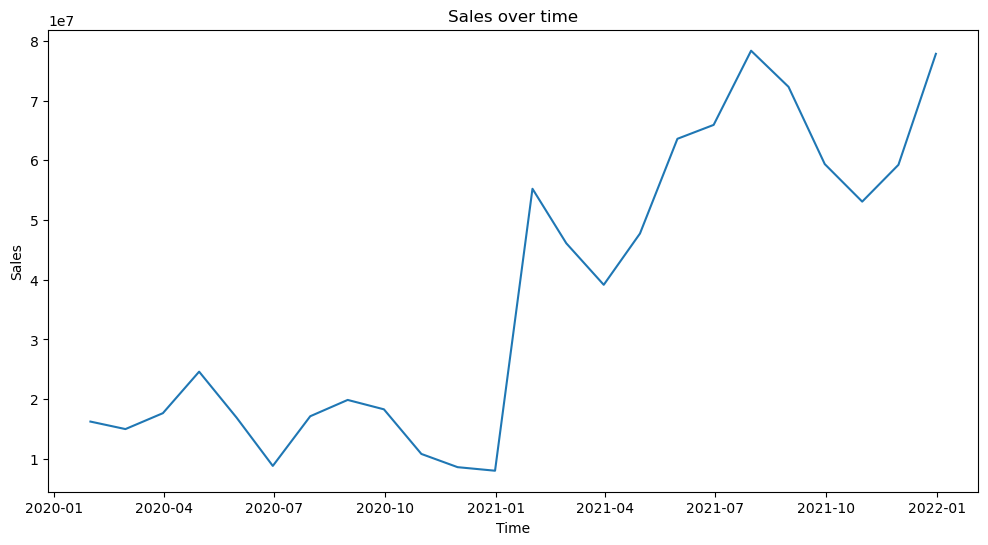

In [37]:
# Tính tổng doanh số theo tháng
monthly_sales = df.resample('M', on='Invoice Date')['Total Sales'].sum()

# Trực quan hóa doanh số theo thời gian
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Sales over time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()


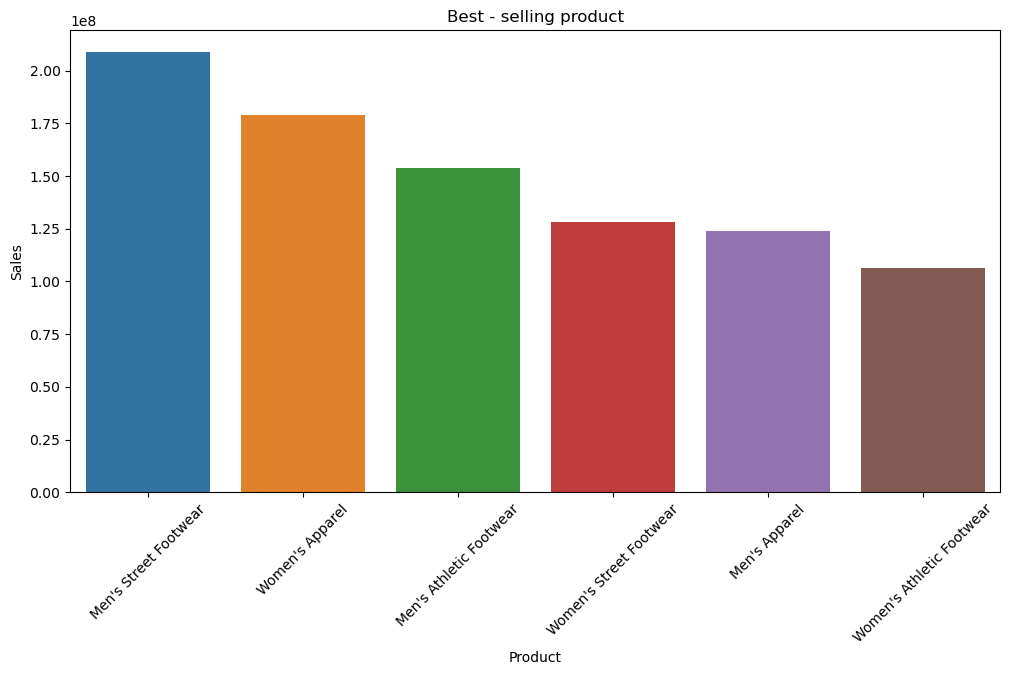

In [38]:
# Tính tổng doanh số theo sản phẩm
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

# Trực quan hóa sản phẩm bán chạy nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Best - selling product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


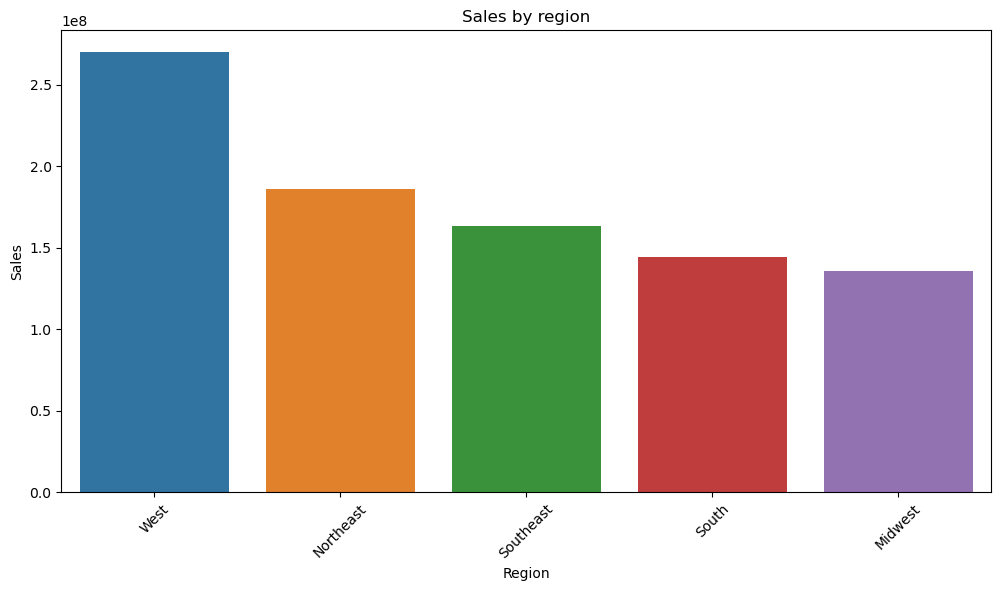

In [39]:
# Tính tổng doanh số theo khu vực
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Trực quan hóa doanh số theo khu vực
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Sales by region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


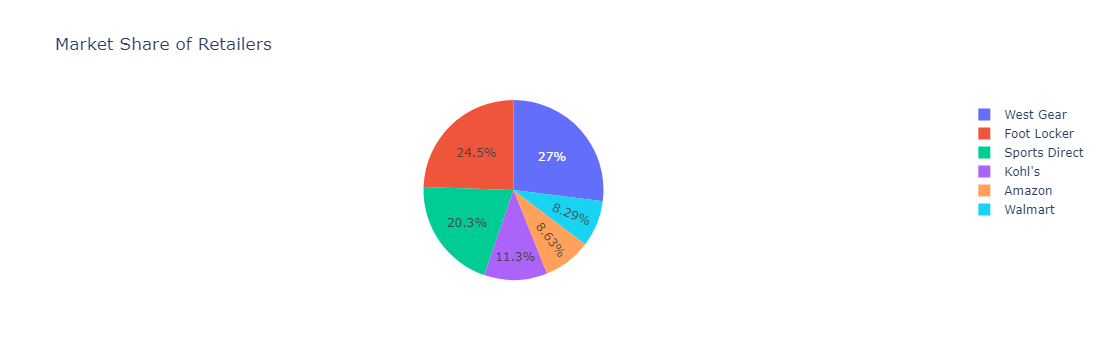

In [36]:
#Thị phần các nhà bán lẻ
import plotly.express as px

# Nhóm dữ liệu theo nhà bán lẻ và tính tổng doanh số của từng nhà bán lẻ
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()

# Tính tổng doanh thu của tất cả các nhà bán lẻ
total_sales = retailer_sales.sum()

# Tính thị phần của mỗi nhà bán lẻ bằng cách chia tổng doanh số bán hàng của họ cho tổng doanh số bán hàng của tất cả các nhà bán lẻ
market_share = retailer_sales / total_sales

# Tạo biểu đồ hình tròn 
fig = px.pie(market_share, values=market_share, names=market_share.index, title='Market Share of Retailers')

# Hiển thị
fig.show()

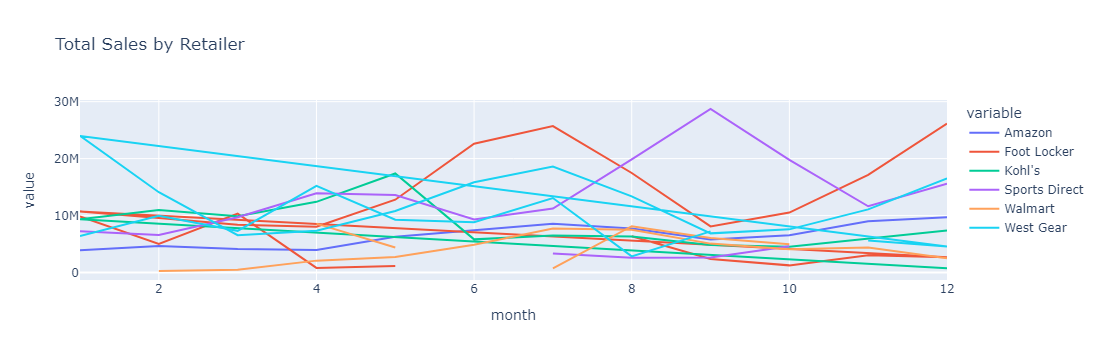

In [29]:
# Convert the Invoice Date column to datetime data type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the month and year from the Invoice Date
df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year

# Group the data by retailer, year, and month and sum the total sales for each group
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')

# Show the plot
fig.show()

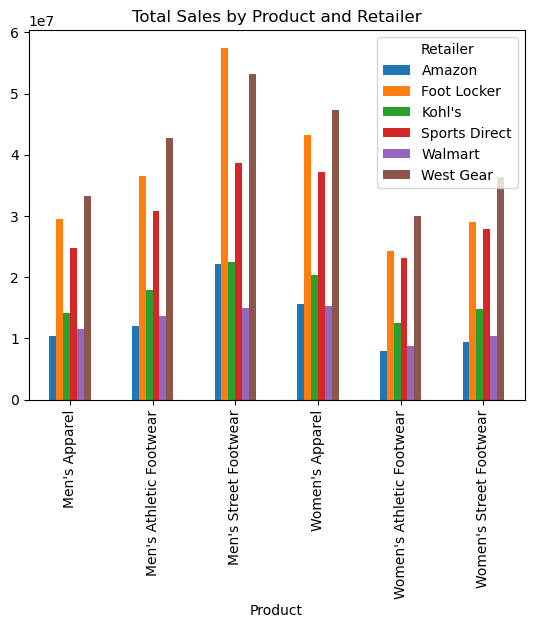

In [35]:
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=0)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()